In [18]:
from sklearn import datasets
import sklearn.utils._cython_blas
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

In [19]:
import torchvision
from torchvision.transforms import Compose, Lambda, ToTensor
import torch

In [20]:
from utils import visualize_optimizer
from checker import test_optimizer
from typing import List

Zadanie1: Rozważ poniższe dane. Zastosuj algorytm SVM dla różnych parametrów C: 0.01, 10. Zwizualizuj i skomentuj w kilku zdaniach otzymane wyniki.

In [21]:
#Dane: 
X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 2, cluster_std = 2.4)

In [22]:
#Standaryzacja danych, podział na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
#SVM dla C równego 0.01
svm = SVC(kernel='linear', C=0.01, random_state=0)
svm.fit(X_train_std, y_train);

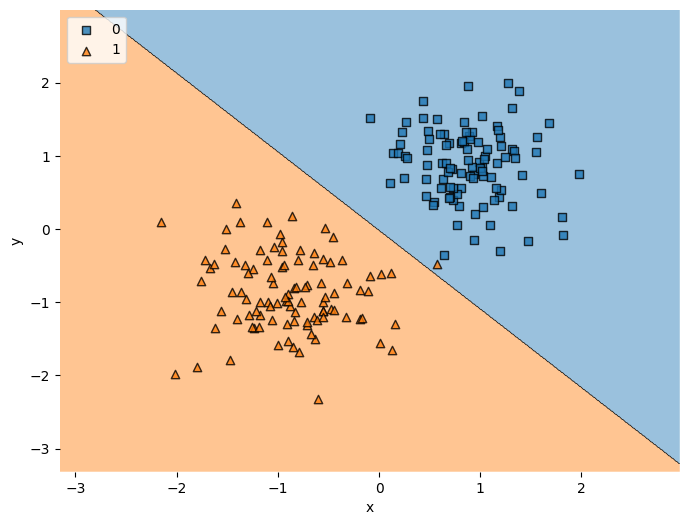

In [24]:
#wizualizacja
plt.figure(figsize=(8, 6))

X_all = np.vstack( (X_train_std, X_test_std) )
y_all = np.hstack( (y_train, y_test) )
plot_decision_regions(X=X_all, y=y_all, clf=svm)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

In [25]:
#Dokładność:
print("{0:.5f}".format(svm.score(X_test_std, y_test)))


1.00000


In [26]:
#SVM dla C równego 10
svm = SVC(kernel='linear', C=10, random_state=0)
svm.fit(X_train_std, y_train);

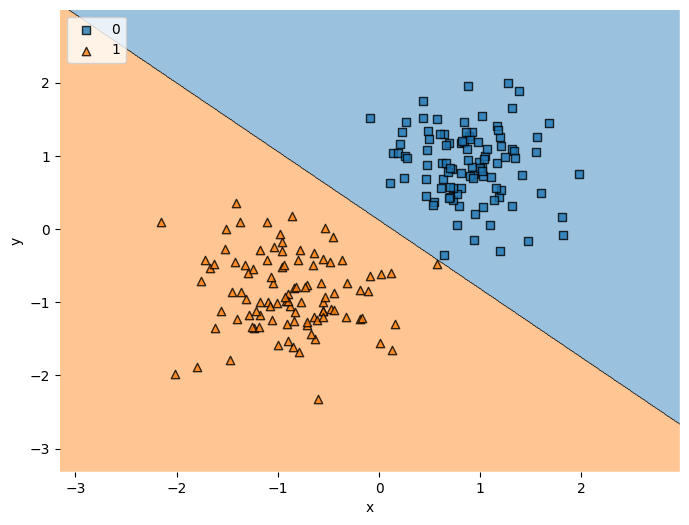

In [27]:
#wizualizacja
plt.figure(figsize=(8, 6))

X_all = np.vstack( (X_train_std, X_test_std) )
y_all = np.hstack( (y_train, y_test) )
plot_decision_regions(X=X_all, y=y_all, clf=svm)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

In [28]:
#Dokładność:
print("{0:.5f}".format(svm.score(X_test_std, y_test)))


1.00000


KOMENTARZ: W przypadku niższej wartości C widać że dane nie zostały idealnie skategoryzowane- jeden punkt (zmienna?) znajduje się nie po tej stronie prostej, po której powinna być. Podniesienie tej wartości do C=10 powoduje, że dane rozłożone są już tak, jak byśmy tego oczekiwali (bo przesuwa się/zmienia margines). Jest to zgodne z założeniem, że im większa wartość parametru C, tym dokładniej zostaną sklasyfikowane dane. Parametr C jest związany z regularyzacją - wyższe C oznacza mniejszą regularyzację (więc przy C= 0.1 jest ona większa). 
Co ciekawe obliczona dokładność jest w obu przypadkach taka sama i w obu wynosi równe 1 (specjalnie sprawdziłam 5 miejsc po przecinku, czy tam dalej się coś nie różni od siebie).  

Zadanie2: Przetestować inne wartości gamma (np. 10, 50) dla danych wyżej. Skomentować wyniki w konkteście definicji parametru gamma.

In [30]:
#Dane: 
X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 2, cluster_std = 2.4)

In [31]:
#Standaryzacja danych, podział na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

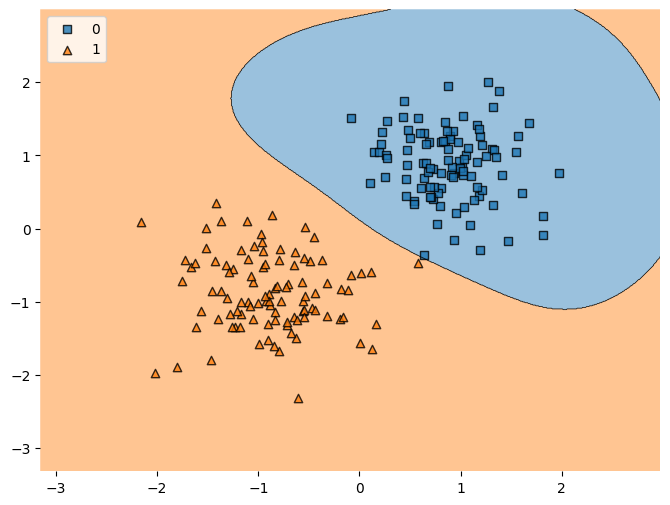

In [49]:
#SVM dla C =10, gamma = 0.1
#używam C=10, bo z zadania 1 wiemy że gwarantuje to większą dokładność
svm = SVC(kernel='rbf', C=10, gamma=1, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.legend(loc='upper left')
plt.show()

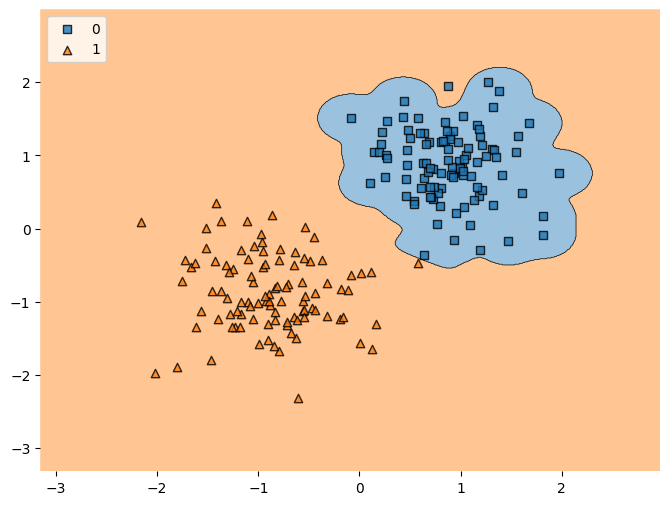

In [41]:
#SVM dla C =10, gamma = 30
svm = SVC(kernel='rbf', C=10, gamma=30, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.legend(loc='upper left')
plt.show()

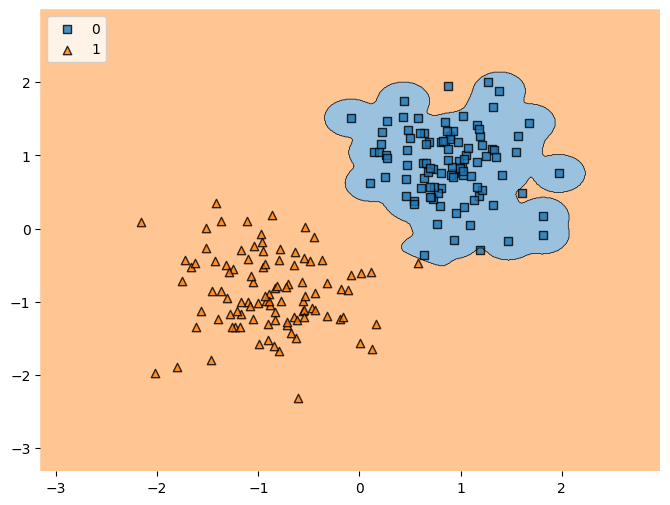

In [42]:
#SVM dla C =10, gamma = 50
svm = SVC(kernel='rbf', C=10, gamma=50, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.legend(loc='upper left')
plt.show()

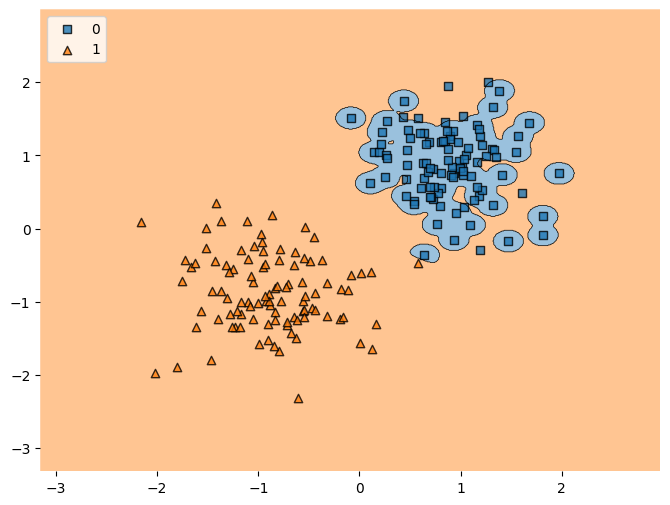

In [50]:
#SVM dla C =50, gamma = 150
svm = SVC(kernel='rbf', C=50, gamma=150, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.legend(loc='upper left')
plt.show()

KOMENTARZ: Wzrost parametru gamma powoduje zmniejszenie marginesu. Przy niskim gamma dane są separowane liniowo, a wraz z jego wzrostem przestają być i powstają płaszczyzny odpowiadające odpowiedniemu rozkładowi danych. Ale przy zbyt wysokim parametrze gamma dochodzi do przeuczenia modelu i błędnego klasyfikowania danych (model staje się tak "dokładny" że odrzuca te pasujące dane, mówiąc kolokwialnie)

In [55]:
class Optimizer:
    """Base class for each optimizer"""
    
    def __init__(self, initial_params):
        # store model weights
        self.params = initial_params
    
    def step(self):
        """Updates the weights stored in self.params"""
        raise NotImplementedError()
         
    def zero_grad(self):
        """Torch accumulates gradients, so we need to clear them after every update"""
        for param in self.params:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

Zadanie3: Uzupełnij definicję poniższej klasy.


In [68]:
class Momentum(Optimizer):
    
    def __init__(self, initial_params, learning_rate, gamma):
        super().__init__(initial_params)
        
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.deltas = []
        
        for param in self.params:
            self.deltas.append(torch.zeros_like(param))
              
    @torch.no_grad()
    
    def step(self):
        
        range_list = []
        for i in range(len(self.params)):
            range_list.append(i)
        
        zipped = zip(self.params, range_list)
        
        for param, x in zipped:
            self.deltas[x] = (self.gamma * self.deltas[x]) + (self.learning_rate * param.grad)
            param = param - self.deltas[x]
            
#chociaż zastanawiam się co z tym t+1 we wzorze, czy to nie powinno być tak? : 
#for param, x in zipped:
#            self.deltas[x+1] = (self.gamma * self.deltas[x]) + self.learning_rate
#            param = param - self.deltas[x+1]


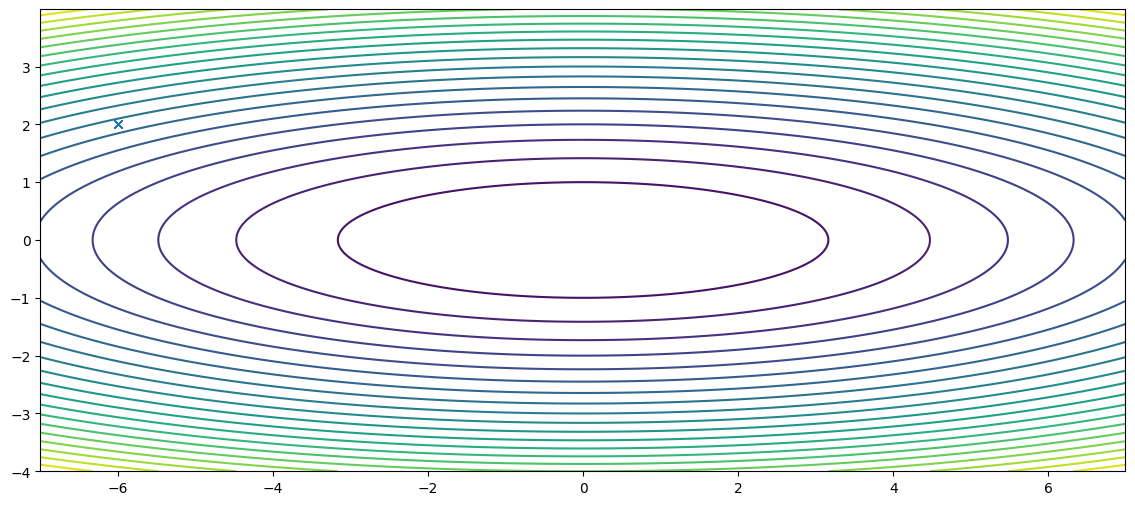

In [69]:
visualize_optimizer(Momentum, n_steps=20, learning_rate=0.05, gamma=0.8)


In [ ]:
#oj coś tu poszło nie tak niestety 

#A dlaczego ustawiamy learning rate na 0.05 skoro zwykle przyjmuje się wartości 0.001- 0.01? 

Zadanie4: Uzupełnij definicję poniższej klasy.


In [79]:
import math 

class Adagrad(Optimizer):
    
    def __init__(self, initial_params, learning_rate, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.epsilon = epsilon
       
        self.G = [] 
        for param in self.params:
            self.G.append(torch.zeros_like(param))
    
    @torch.no_grad()
    
    def step(self):
        
        range_list = []
        for i in range(len(self.params)):
            range_list.append(i)
        
        zipped = zip(self.params, range_list)
        
        for param, x in zipped:
            self.G[x] += param.grad**2
            square_root = torch.sqrt(self.G[x] + self.epsilon)
            param = param - (self.learning_rate/square_root) * param.grad
            
            

In [80]:
test_optimizer(Adagrad)

AssertionError: 

In [ ]:
#No i tutaj też :(

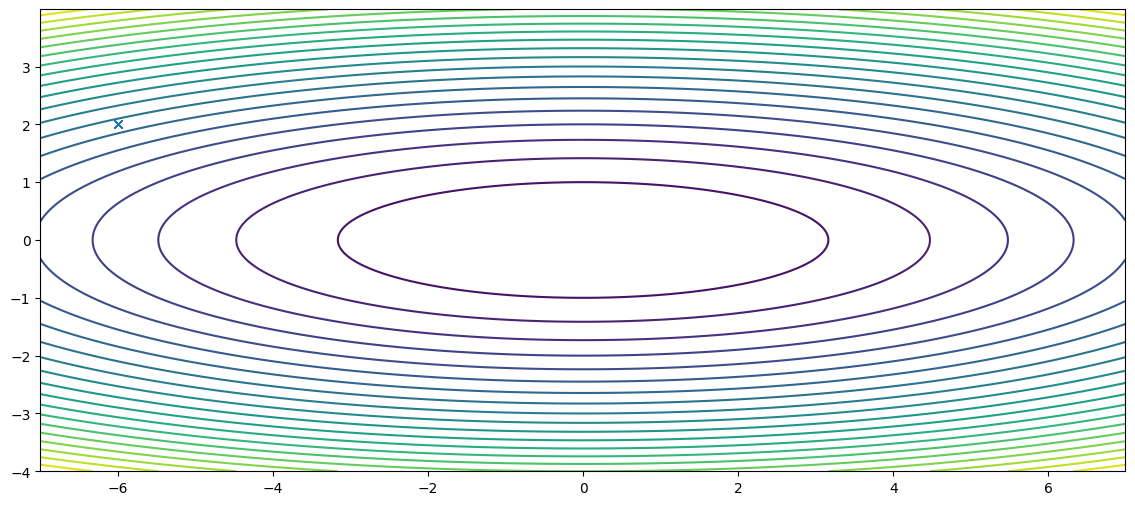

In [81]:
visualize_optimizer(Adagrad, n_steps=20, learning_rate=1.0, epsilon=1e-8)

Zadanie5: Uzupełnij definicję poniższej klasy.


In [84]:
class RMSProp(Optimizer):
    
    def __init__(self, initial_params, learning_rate, gamma, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        
        self.H = [] 
        for param in self.params:
            self.H.append(torch.zeros_like(param))
        
    @torch.no_grad()
    
    def step(self):
        range_list = []
        for i in range(len(self.params)):
            range_list.append(i)
        
        zipped = zip(self.params, range_list)
        
        for param, x in zipped:
            self.H[x] += self.gamma * self.H[x] + (1-self.gamma) * (param.grad**2)
            square_root = torch.sqrt(self.H[x] + self.epsilon)
            param = param - (self.learning_rate/square_root) * param.grad
        
        

In [85]:
test_optimizer(RMSProp)

AssertionError: 

In [ ]:
#I tutaj jest taki sam problem jak wyżej - nie przechodzi testów assert?

In [ ]:
visualize_optimizer(RMSProp, n_steps=10, learning_rate=0.5, gamma=0.9, epsilon=1e-8)

Zadanie6: Uzupełnij definicję poniższej klasy.


In [89]:
class Adadelta(Optimizer):
    def __init__(self, initial_params, gamma, epsilon):
        super().__init__(initial_params)
        self.gamma = gamma
        self.epsilon = epsilon
        self.D = []
        self.H = []
        self.deltas = []
         
        for param in self.params:
            self.D.append(torch.zeros_like(param)) 
            self.H.append(torch.zeros_like(param))
            self.deltas.append(torch.zeros_like(param))
    
    @torch.no_grad()
    
    def step(self):
        range_list = []
        for i in range(len(self.params)):
            range_list.append(i)
        
        zipped = zip(self.params, range_list)
        
        for param, x in zipped:
            self.H[x] += self.gamma * self.H[x] + (1-self.gamma) * (param.grad**2)
            square_root_upper = torch.sqrt(self.D[x] + self.epsilon)
            square_root_lower = torch.sqrt(self.H[x] +self.epsilon)
            self.deltas[x] = (square_root_upper/square_root_lower) * param.grad
            
            param = param - self.deltas[x]
            
            self.D[x] = (self.gamma * self.D[x]) + (1 - self.gamma) * (self.deltas[x]**2) 
        

In [90]:
test_optimizer(Adadelta)

AssertionError: 

In [ ]:
visualize_optimizer(Adadelta, n_steps=10, gamma=0.9, epsilon=1e-1)

In [ ]:
#No i bez zaskoczeń, to samo :C a jak patrzę na te wszystkie kody to wydaje 
#mi się że dobrze mam zaimplementowane wzory matematyczne, 
#więc może tu jest jakiś niedobór mojej wiedzy Pythonowej

Zadanie7: Uzupełnij definicję poniższej klasy.


In [91]:
class Adam(Optimizer):
   
    def __init__(self, initial_params, learning_rate, beta1, beta2, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        
        self.M = []
        self.V = []
        
        for param in self.params:
            self.M.append(torch.zeros_like(param)) 
            self.V.append(torch.zeros_like(param))
            
    @torch.no_grad()
    def step(self,):
        
        range_list = []
        for i in range(len(self.params)):
            range_list.append(i)
        
        zipped = zip(self.params, range_list)
        
        for param, x in zipped:

            self.M[x] = self.beta1 * self.M[x] + (1 - self.beta1) * param.grad
            self.V[x] = self.beta2 *self.V[x] + (1 - self.beta2) * (param.grad**2)

            M_corr = self.M[x] / (1- self.beta1)
            V_corr = self.V[x] / (1- self.beta2)
         
            square_root_lower = torch.sqrt(V_corr) + self.epsilon

            param = param - self.learning_rate * (M_corr / square_root_lower)

        

In [92]:
test_optimizer(Adam)

AssertionError: 

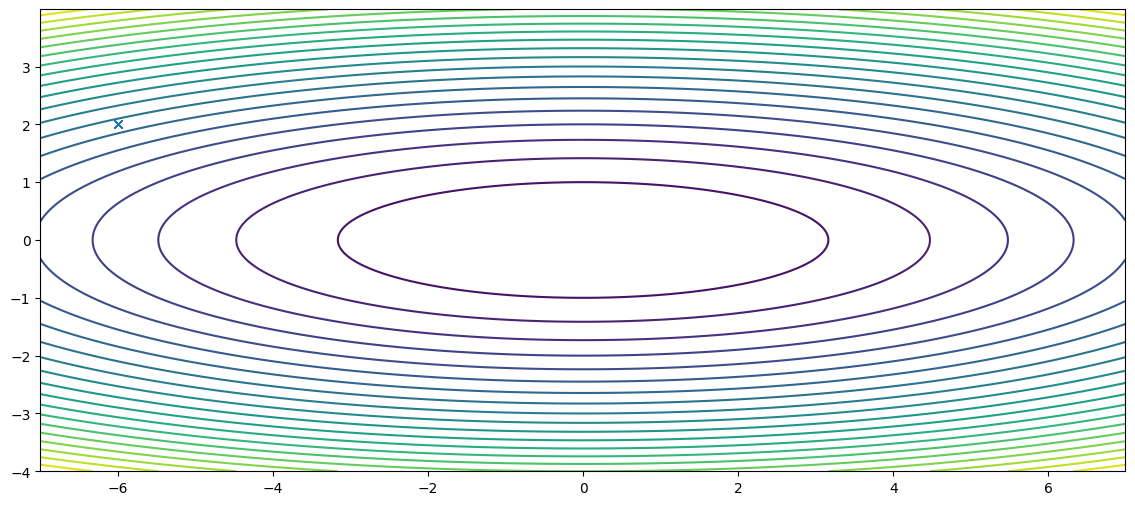

In [93]:
visualize_optimizer(Adam, n_steps=20, learning_rate=0.35, beta1=0.9, beta2=0.999, epsilon=1e-8)